In [ ]:
import pandas as pd

In [ ]:
df1 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/datasets/Aracaju.xlsx")
df2 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/datasets/Fortaleza.xlsx")
df3 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/datasets/Natal.xlsx")
df4 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/datasets/Recife.xlsx")
df5 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/datasets/Salvador.xlsx")

In [ ]:
df = pd.concat([df1,df2,df3,df4,df5])

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [ ]:
df["LojaID"].value_counts(ascending=False)
#conta a quantidade de lojas por id

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

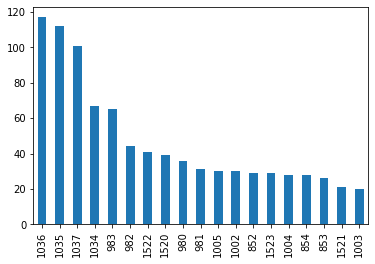

In [ ]:
#gerando um gráfico de barras
df["LojaID"].value_counts(ascending=False).plot.bar()

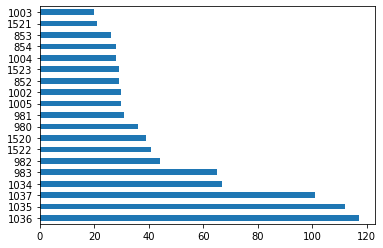

In [ ]:
#gerando um gráfico de barras horizontais
df["LojaID"].value_counts(ascending=False).plot.barh()

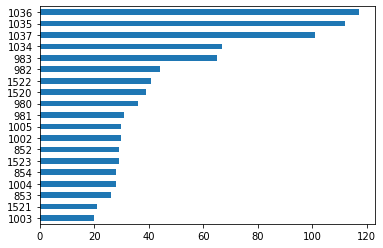

In [ ]:
#gerando um gráfico de barras horizontais do menor para o maior
#o ; tira a linha de cima do grafico
df["LojaID"].value_counts(ascending=True).plot.barh();

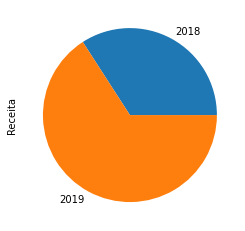

In [ ]:
#grafico de pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [ ]:
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [ ]:
#total de vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

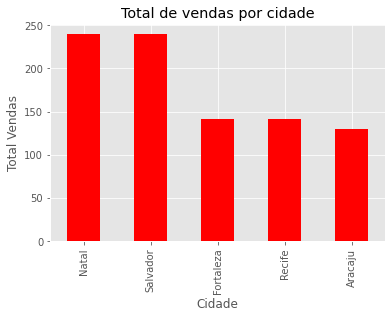

In [ ]:
#add um titulo para o grafico e mudando nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade", color="red");
plt.xlabel("Cidade");
plt.ylabel("Total Vendas");

In [ ]:
#tem vários estilos diferentes na documentação, só entrar lá e copiar o nome
plt.style.use("ggplot")

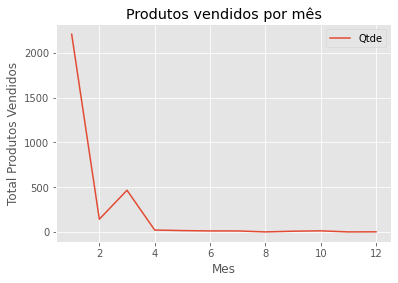

In [ ]:
#.plot = grafico de linhas
df.groupby(["Mes_venda"])["Qtde"].sum().plot(title = "Produtos vendidos por mês");
plt.xlabel("Mes");
plt.ylabel("Total Produtos Vendidos");
plt.legend();

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_venda,Mes_venda,Dia_venda
0,Aracaju,2018-01-01,142.00,1520,1,142.00,2018,1,1
1,Aracaju,2018-01-01,14.21,1522,6,85.26,2018,1,1
2,Aracaju,2018-01-01,71.55,1520,1,71.55,2018,1,1
3,Aracaju,2018-01-01,3.01,1521,7,21.07,2018,1,1
4,Aracaju,2018-01-01,24.51,1522,8,196.08,2018,1,1


In [ ]:
df["Ano_venda"] = df["Data"].dt.year
df["Mes_venda"] = df["Data"].dt.month
df["Dia_venda"] = df["Data"].dt.day

In [ ]:
#agrupando as vendas por mes
df.groupby(df["Mes_venda"])["Qtde"].sum()

Mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [ ]:
#selecionando um ano especifico
df_2019 = df[df["Ano_venda"] == 2019]

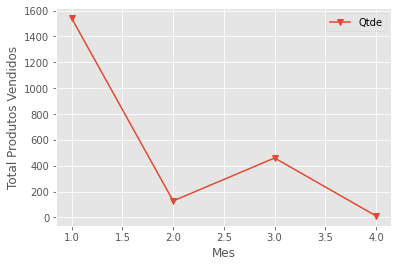

In [ ]:
#produtos vendidos por mes em 2019
df_2019.groupby(df_2019["Mes_venda"])["Qtde"].sum().plot(marker='v');
plt.xlabel("Mes");
plt.ylabel("Total Produtos Vendidos");
plt.legend();

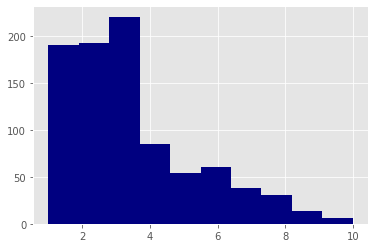

In [ ]:
#histograma
plt.hist(df["Qtde"], color = "navy");

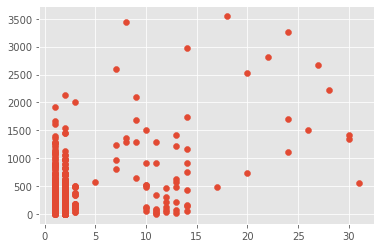

In [ ]:
#grafico de dispersão
plt.scatter(x=df_2019["Dia_venda"],y=df_2019["Receita"]);

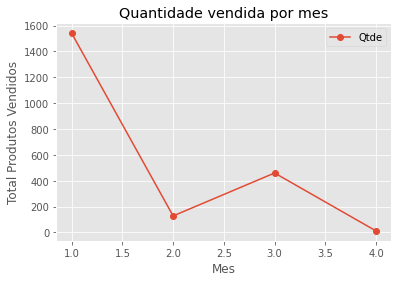

In [ ]:
#salvando grafico
df_2019.groupby(df_2019["Mes_venda"])["Qtde"].sum().plot(marker="o")
plt.title("Quantidade vendida por mes");
plt.xlabel("Mes");
plt.ylabel("Total Produtos Vendidos");
plt.legend();
plt.savefig("grafico qtde x mes.png")